In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from datetime import datetime
from scipy import stats
from collections import Counter

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

plt.style.use("seaborn")

u, s = "µ", "σ"

In [2]:
def test_normal(x):
    k2, p = stats.normaltest(x)
    alpha = 1e-3
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("It's not a normal distribution")
    else:
        print("It's a normal distribution")
        
    plt.hist(x)
    plt.show()

In [140]:
def stackedbarchart_from_contingency(contingencyTable,xlabel=None,title=None):
    percentages = []


    for i,target_col in enumerate(contingencyTable.columns):
        percentage_onelabel = []
        for j,label in enumerate(contingencyTable.index):
            val = contingencyTable.loc[label][target_col]
            summe = contingencyTable.loc[label].sum()
            percentage = (val/summe) *100
            percentage_onelabel.append(percentage)

        val = contingencyTable[target_col].sum()
        total = contingencyTable.sum().sum()

        percentage_onelabel.append(val*100/total)
        percentages.append(percentage_onelabel)


    percentages_backup = deepcopy(percentages)
    # print('per',percentages)

    # add up preceeding percentages for barchart
    for i in range(1,len(percentages)):
        for j in range(0,len(percentages[i])):
            percentages[i][j] += percentages[i-1][j]

    # print(percentages,contingencyTable.index)
    colors = ['grey','lightgrey','black','dimgrey']
    plt.figure(figsize=(15,5))
    
    # print(percentages)
    
    labels = list(contingencyTable.index)+['total']
    labels = [str(v) for v in labels]

    for i in range(len(percentages)-1,-1,-1):
        if "date" in title or "Date" in title:
            plt.plot(labels, percentages[i])
            
        plt.bar(labels,percentages[i],label=contingencyTable.columns[i],color=colors[i])
    
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(title)
    
    plt.legend(loc="upper right")
    plt.show()

    # print('In Percent ',list(contingencyTable.index)+['total'])

    data = []
    data_transposed = []
    for i in range(len(percentages_backup)-1,-1,-1):
        # print(contingencyTable.columns[i],percentages_backup[i])
        data_transposed.append(percentages_backup[i])

    data_transposed = list(reversed(data_transposed))
    for i in range(len(data_transposed[0])):
        row = []
        for j in range(len(data_transposed)):
            row.append(data_transposed[j][i])
        
        data.append(row)
    
    df = pd.DataFrame(data=data,columns=contingencyTable.columns, index=list(contingencyTable.index)+['total'])
    try:
        totalratio = df.loc['total'][0] /df.loc['total'][1]
        df['Abweichung von Total'] = df.iloc[:,0]/df.iloc[:,1] - totalratio
    except:
        print('Cant generate total')

    print(df)
    print("\n\n")

In [5]:
crosstab = pd.crosstab(df["job"], df["classification"]) # classification needs to be binary
chi2, pval, dof, expectedFreq=chi2_contingency(crosstab) # single features as inputs

cl_good = df[df["classification"] == "good"]["duration [month]"] # creation of two df series based on binary
cl_bad = df[df["classification"] == "bad"]["duration [month]"]
t_val, p_val = ttest_ind(cl_good, cl_bad) # pval for each feature

# Übersicht

In [8]:
df = pd.read_csv("data/Superstore_OrderAndReturns.csv")
print(df.shape)
df.head(1)

(9994, 22)


,orderReturned,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [9]:
df.columns

Index(['orderReturned', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [17]:
df["order_dt"] = [datetime.strptime(date, '%Y-%m-%d') for date in df["Order Date"].to_list()]
df["ship_dt"] = [datetime.strptime(date, '%Y-%m-%d') for date in df["Ship Date"].to_list()]

# Aufgabe 1

In [27]:
diffs = [df.iloc[i]["ship_dt"] - df.iloc[i]["order_dt"] for i in range(df.shape[0])]
df["dt_diff"] = [date.days for date in diffs]
df.head(1)

,orderReturned,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_dt,ship_dt,dt_diff
0,False,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016-11-08,2016-11-11,3


In [31]:
df_ten_days = df[(df["dt_diff"] >= 0) & (df["dt_diff"] <= 10)]
df_ten_days.shape

(9994, 25)

No handles with labels found to put in legend.


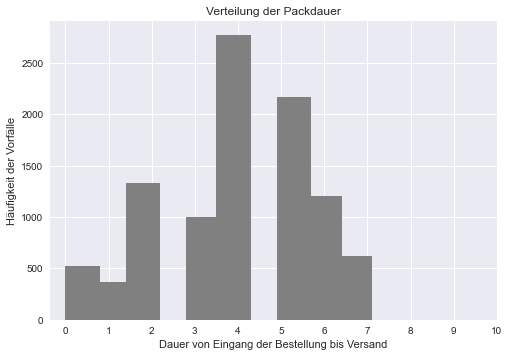


################################################
CAPTION Abbildung 1:
Diese Abbildung zeigt die Verteilung der Packtage zwischen Bestellung und Versand.
µ(Packtage) = 3.96, σ(Packtage) = 1.75
################################################



In [48]:
x_data = df_ten_days["dt_diff"] # can be a range object

title = "Verteilung der Packdauer"
x_label = "Dauer von Eingang der Bestellung bis Versand"
y_label = "Häufigkeit der Vorfälle"

caption = f"""
################################################
CAPTION Abbildung 1:
Diese Abbildung zeigt die Verteilung der Packtage zwischen Bestellung und Versand.
{u}(Packtage) = {df_ten_days['dt_diff'].mean():.2f}, {s}(Packtage) = {df_ten_days['dt_diff'].std():.2f}
################################################
"""

# plt.figure(figsize=(15, 8))
plt.title(title)

plt.hist(x=x_data, color="gray", rwidth=1, width=0.8) #, label="LABEL") #s=size
plt.xticks(range(11), range(11))

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()

plt.show()
print(caption)

In [49]:
df.dtypes

orderReturned              bool
Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
order_dt         datetime64[ns]
ship_dt          datetime64[ns]
dt_diff                   int64
dtype: object

In [50]:
df.head()

,orderReturned,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_dt,ship_dt,dt_diff
0,False,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11,3
1,False,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11,3
2,False,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16,4
3,False,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18,7
4,False,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18,7


# Aufgabe 2

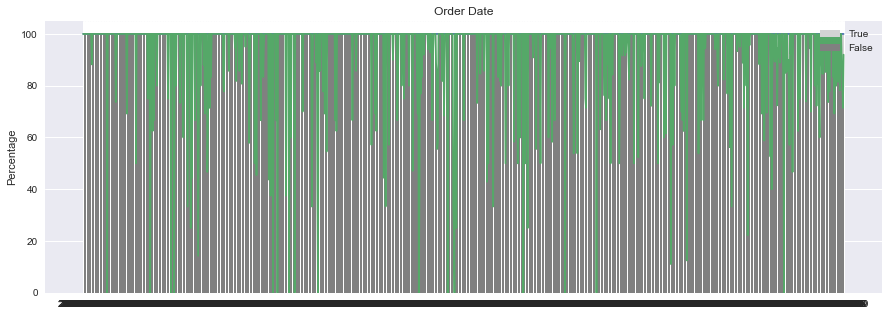

orderReturned       False       True  Abweichung von Total
2014-01-03     100.000000   0.000000                   inf
2014-01-04     100.000000   0.000000                   inf
2014-01-05     100.000000   0.000000                   inf
2014-01-06     100.000000   0.000000                   inf
2014-01-07     100.000000   0.000000                   inf
...                   ...        ...                   ...
2017-12-27     100.000000   0.000000                   inf
2017-12-28      89.473684  10.526316               -2.9925
2017-12-29      83.333333  16.666667               -6.4925
2017-12-30      71.428571  28.571429               -8.9925
total           91.995197   8.004803                0.0000

[1238 rows x 3 columns]





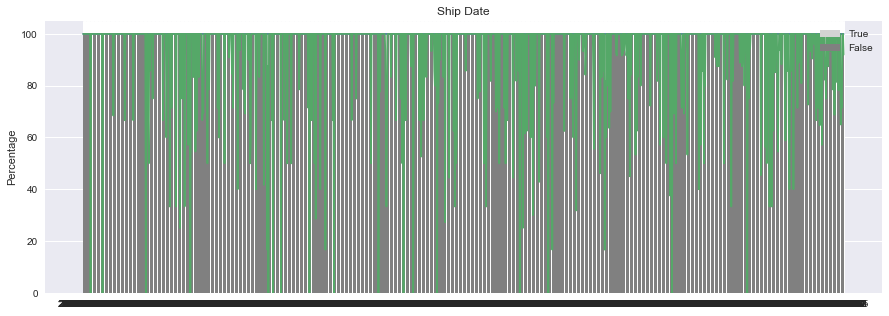

orderReturned       False       True  Abweichung von Total
2014-01-07     100.000000   0.000000                   inf
2014-01-08     100.000000   0.000000                   inf
2014-01-10     100.000000   0.000000                   inf
2014-01-12     100.000000   0.000000                   inf
2014-01-13     100.000000   0.000000                   inf
...                   ...        ...                   ...
2018-01-02      75.000000  25.000000               -8.4925
2018-01-03      71.428571  28.571429               -8.9925
2018-01-04     100.000000   0.000000                   inf
2018-01-05     100.000000   0.000000                   inf
total           91.995197   8.004803                0.0000

[1335 rows x 3 columns]





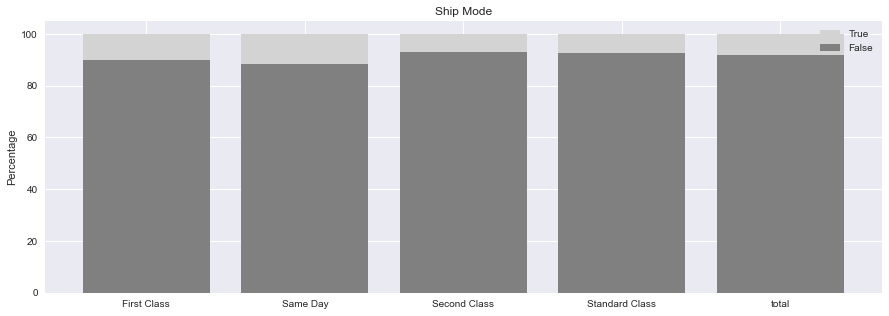

orderReturned       False       True  Abweichung von Total
First Class     90.117035   9.882965             -2.374079
Same Day        88.213628  11.786372             -4.008125
Second Class    93.110540   6.889460              2.022425
Standard Class  92.459786   7.540214              0.769722
total           91.995197   8.004803              0.000000





KeyboardInterrupt: 

In [141]:
returned = df[df["orderReturned"] == True]
not_returned = df[df["orderReturned"] == False]

results = pd.DataFrame({"Feature": [], "p-val": []})

for feature in df.columns:
    if feature in ["Row ID", "Order ID", "Postal Code"]:
        continue
    
    if str(df[feature].dtype) in ["int64", "float64"]:
        _, p_val = ttest_ind(returned[feature], not_returned[feature])
    elif str(df[feature].dtype) == "object":
        contingencyTable = pd.crosstab(df[feature], df["orderReturned"])
        chi2, p_val, dof, expectedFreq = chi2_contingency(contingencyTable)
        
        if feature in names:
            stackedbarchart_from_contingency(contingencyTable, title=feature)
    else:
        # print(feature)
        # print("ERROR")
        continue
        
    results.loc[len(results)] = [feature, p_val]
        
# results.sort_values(by="p-val").reset_index(inplace=True)
results.shape

In [66]:
final = results[results["p-val"] < 0.05]
final

,Feature,p-val
0,Order Date,7.234670e-209
1,Ship Date,4.180095e-231
2,Ship Mode,4.142917e-05
3,Customer ID,3.796175e-192
4,Customer Name,3.796175e-192
5,Segment,4.130370e-02
7,City,4.140227e-125
8,State,3.267149e-62
9,Region,3.688494e-74
18,dt_diff,3.575778e-02


In [86]:
final = final.sort_values(by="p-val")
output = []
names = []
for i in range(10):
    output.append((final.iloc[i]["Feature"], final.iloc[i]["p-val"]))
    names.append(final.iloc[i]["Feature"])

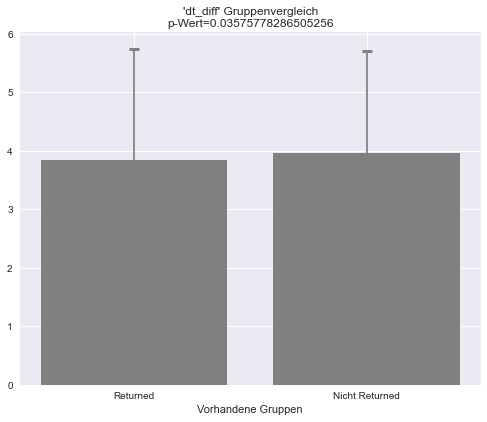

In [84]:
# ylabels = ["Alter in Jahren", "Kosten in Geldeinheit", "Größe in inch", "Anzahl Haustiere", "BMI", "Gewicht in kg", "Distanz zur Arbeit", "Abwesenheitsgrund", "Abwesenheit in Studen", "Monat der Abwesenheit", "Anzahl Kinder", "Hit target", "Arbeitszeit pro Tag"]

def plot_bars(x, y, yerr, title, xl, yl=None):
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.xticks(
        range(2),
        ["Returned", "Nicht Returned"]
    )

    plt.bar(x=x, height=y, color="gray")
    plt.errorbar(x, y=y, yerr=yerr, ls="none", color="gray", capsize=5, capthick=3)
    plt.ylim(0)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.99, 
                    wspace=0.4, 
                    hspace=0.4)

for idx, feature in enumerate(output):
    try:
        plot_bars(
            range(2),
            [returned[feature[0]].mean(), not_returned[feature[0]].mean()],
            [returned[feature[0]].std(), not_returned[feature[0]].std()],
            f"'{feature[0]}' Gruppenvergleich\np-Wert={feature[1]}",
            f"Vorhandene Gruppen",
            # ylabels[idx]
        )
    except:
        pass
        
    try:
        contingencyTable = pd.crosstab(df[feature[0]], df["orderReturned"])
        chi2, p_val, dof, expectedFreq = chi2_contingency(contingencyTable)
    except:
        print(feature)
plt.show()

# Aufgabe 3

In [121]:
df.columns

Index(['orderReturned', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'order_dt', 'ship_dt', 'dt_diff'],
      dtype='object')

In [134]:
ylabels = ["orderReturned", "Profit", "Discount", "dt_diff", "Region", "Category"]

In [122]:
new_df = df.groupby("orderReturned").std()["Segment"]

x_data = ["Zurückgeschickt", "Behalten"]
y_data = df.groupby("orderReturned").mean()["Segment"]
yerr = df.groupby("orderReturned").std()["Segment"]

title = "Packtage"
x_label = "Art der Sendung"
y_label = "Packtage in Tagen"

caption = f"""
################################################
CAPTION: 
{u}: {y_data.to_list()}
{s}: {yerr.to_list()}
################################################
"""

plt.figure(figsize=(5, 5))

plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.bar(x=x_data, height=y_data, color="gray")
plt.errorbar(x_data, y=y_data, yerr=yerr, ls="none", color="gray", capsize=5, capthick=3)

plt.ylim(0)
plt.show()
print(caption)

KeyError: 'Segment'

# Aufgabe 4

In [127]:
df_corr = df[ylabels]
df_corr.corr()

,Profit,Discount,dt_diff
Profit,1.000000,-0.219487,-0.004649
Discount,-0.219487,1.000000,0.000408
dt_diff,-0.004649,0.000408,1.000000


In [135]:
copy = df[ylabels]
copy.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,orderReturned,Profit,Discount,dt_diff,Region,Category
orderReturned,1.000000,-0.012076,-0.007891,0.017768,-0.066494,0.004061
Profit,-0.012076,1.000000,0.106809,-0.009938,-0.001697,-0.024523
Discount,-0.007891,0.106809,1.000000,-0.017143,0.129840,-0.137577
dt_diff,0.017768,-0.009938,-0.017143,1.000000,-0.003837,-0.006518
Region,-0.066494,-0.001697,0.129840,-0.003837,1.000000,0.003213
Category,0.004061,-0.024523,-0.137577,-0.006518,0.003213,1.000000


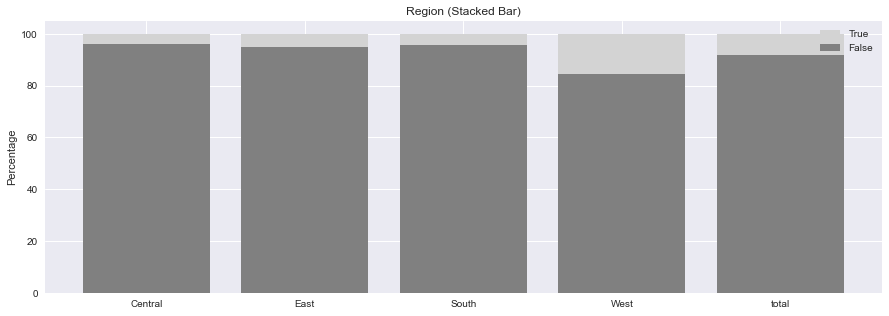

orderReturned      False       True  Abweichung von Total
Central        96.039604   3.960396             12.757500
East           94.768258   5.231742              6.621594
South          95.740741   4.259259             10.985761
West           84.701842  15.298158             -5.955765
total          91.995197   8.004803              0.000000





In [133]:
contingencyTable = pd.crosstab(df["Region"], df["orderReturned"])
chi2, p_val, dof, expectedFreq = chi2_contingency(contingencyTable)

stackedbarchart_from_contingency(contingencyTable, title="Region (Stacked Bar)")